In [23]:
import numpy as np
import pandas as pd
import json
import os
import cv2


In [24]:
# Absolute main path
main_path = '../data/'

# Read JSON file into a DataFrame with unprocessed instance col
wlas_df = pd.read_json(main_path + 'WLASL_v0.3.json')

print(wlas_df.head())
print(wlas_df.shape)


      gloss                                          instances
0      book  [{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...
1     drink  [{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...
2  computer  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
3    before  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
4     chair  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
(2000, 2)


In [25]:
def get_videos_ids(json_list):
    """
    function to check if the video id is available in the dataset
    and return the viedos ids of the current instance

    Input: instance json list
    Output: list of videos_ids
    """
    videos_list = []
    for ins in json_list:
        video_id = ins['video_id']
        if os.path.exists(f'{main_path}videos/{video_id}.mp4'):
            videos_list.append(video_id)
    return videos_list


In [26]:
def get_json_features(json_list):
    """
    function to check if the video id is available in the dataset
    and return the viedos ids and url or any other featrue of the current instance

    input: instance json list
    output: list of videos_ids
    """
    videos_ids = []
    videos_urls = []
    for ins in json_list:
        video_id = ins['video_id']
        video_url = ins['url']
        if os.path.exists(f'{main_path}videos/{video_id}.mp4'):
            videos_ids.append(video_id)
            videos_urls.append(video_url)
    return videos_ids, videos_urls


In [27]:
# Open JSON file (read only)
with open(main_path+'WLASL_v0.3.json', 'r') as data_file:
    json_data = data_file.read()

instance_json = json.loads(json_data)


In [28]:
# Test "get_videos_ids" function with first gloss (word = book) in file
get_videos_ids(instance_json[0]['instances'])[0]


'69241'

In [29]:
# Check output length of function (40 links for book)
# Function returns only ids that can also be found in the 'data/videos' folder
len(get_videos_ids(instance_json[0]['instances']))


6

In [30]:
# Get available video ids for all rows in wlas_df and add to new col 'videos_id'
wlas_df['videos_ids'] = wlas_df['instances'].apply(get_videos_ids)
wlas_df.head()


,gloss,instances,videos_ids
0,book,"[{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...","[69241, 07069, 07068, 07070, 07099, 07074]"
1,drink,"[{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...","[69302, 65539, 17710, 17733, 65540, 17734, 177..."
2,computer,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[12328, 12312, 12311, 12338, 12313, 12314, 123..."
3,before,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[05728, 05749, 05750, 05729, 05730, 65167, 057..."
4,chair,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[09848, 09869, 09849, 09850, 09851, 65328, 09854]"


In [31]:
selected_words = [
    'like',
    'work',
    'play',
    'take',
    'call',
    'go',
    'study',
    'give',
    'write',
    'yesterday',
    'far',
    'hot',
    'cold',
    'good',
    'bad',
    'computer',
    'apple',
    'doctor',
    'family',
    'dog'
]


In [32]:
# Create separate DataFrame for available information in each instance
features_df = pd.DataFrame(columns=['word', 'video_id', 'url'])

for row in wlas_df.iterrows():
    # Extract ids and urls for each row
    ids, urls = get_json_features(row[1][1])
    # Initialize a list matching the length (n) of found ids containing the word
    word = [row[1][0]] * len(ids)
    # Using zip to create new df with:
    # n * word in gloss col (e.g. 6 * book)
    # Unique id and url in ids and url col respectively
    df = pd.DataFrame(list(zip(word, ids, urls)), columns = features_df.columns)
    # Append temporary df to feature_df
    features_df = pd.concat([features_df, df], ignore_index=True)


In [33]:
features_df


,word,video_id,url
0,book,69241,http://aslbricks.org/New/ASL-Videos/book.mp4
1,book,07069,https://signstock.blob.core.windows.net/signsc...
2,book,07068,https://s3-us-west-1.amazonaws.com/files.start...
3,book,07070,https://media.asldeafined.com/vocabulary/14666...
4,book,07099,http://www.aslsearch.com/signs/videos/book.mp4
...,...,...,...
11975,wheelchair,63047,https://www.signingsavvy.com/signs/mp4/5/5233.mp4
11976,wheelchair,63050,http://www.aslsearch.com/signs/videos/wheelcha...
11977,whistle,63186,https://media.spreadthesign.com/video/mp4/13/9...
11978,whistle,63188,https://www.signingsavvy.com/signs/mp4/9/9961.mp4


In [34]:
selected_df = features_df[features_df['word'].isin(selected_words)]
selected_df


,word,video_id,url
21,computer,12328,https://www.signingsavvy.com/signs/mp4/6/6326.mp4
22,computer,12312,https://s3-us-west-1.amazonaws.com/files.start...
23,computer,12311,https://media.spreadthesign.com/video/mp4/13/5...
24,computer,12338,http://www.aslsearch.com/signs/videos/computer...
25,computer,12313,https://s3-us-west-1.amazonaws.com/files.start...
...,...,...,...
1510,good,25076,http://www.aslsearch.com/signs/videos/good.mp4
1511,good,25067,https://s3-us-west-1.amazonaws.com/files.start...
1512,good,25068,https://signstock.blob.core.windows.net/signsc...
1513,good,25069,https://signstock.blob.core.windows.net/signsc...


In [35]:
# Creating csv from selected_df
selected_df.to_csv('../data/selected_df.csv', index=False)


#3 Data Classes Analysis

In [36]:
# Counting number of videos per word in new col 'samples_num'
selected_df['samples_num'] = selected_df['video_id'].apply(len)
selected_df = selected_df.rename(columns={'gloss': 'word'})
selected_df.head()


/var/folders/t4/jvmn38_10_9b8qp67bysts580000gn/T/ipykernel_68798/1290978507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['samples_num'] = selected_df['video_id'].apply(len)


,word,video_id,url,samples_num
21,computer,12328,https://www.signingsavvy.com/signs/mp4/6/6326.mp4,5
22,computer,12312,https://s3-us-west-1.amazonaws.com/files.start...,5
23,computer,12311,https://media.spreadthesign.com/video/mp4/13/5...,5
24,computer,12338,http://www.aslsearch.com/signs/videos/computer...,5
25,computer,12313,https://s3-us-west-1.amazonaws.com/files.start...,5


In [37]:
for video_id in selected_df['video_id']:
    if os.path.exists(f'{main_path}videos/{video_id}.mp4'):
        cap = cv2.VideoCapture(f'{main_path}videos/{video_id}.mp4')
        length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        selected_df.loc[selected_df['video_id'] == video_id, ['video_length']] = int(length)
    pass

selected_df = selected_df.reset_index(drop=True)


In [38]:
selected_df


,word,video_id,url,samples_num,video_length
0,computer,12328,https://www.signingsavvy.com/signs/mp4/6/6326.mp4,5,88.0
1,computer,12312,https://s3-us-west-1.amazonaws.com/files.start...,5,101.0
2,computer,12311,https://media.spreadthesign.com/video/mp4/13/5...,5,72.0
3,computer,12338,http://www.aslsearch.com/signs/videos/computer...,5,107.0
4,computer,12313,https://s3-us-west-1.amazonaws.com/files.start...,5,81.0
...,...,...,...,...,...
214,good,25076,http://www.aslsearch.com/signs/videos/good.mp4,5,86.0
215,good,25067,https://s3-us-west-1.amazonaws.com/files.start...,5,74.0
216,good,25068,https://signstock.blob.core.windows.net/signsc...,5,60.0
217,good,25069,https://signstock.blob.core.windows.net/signsc...,5,21.0


In [39]:
print(selected_df['video_length'].min())


20.0


In [40]:
import cv2
import pandas as pd

# Frame sampling parameters
frames_per_video = 10
#frame_sampling_interval = 5  # Example: Extract every 5th frame

# Function to perform frame sampling
def sample_frames(video_path, frames_per_video, interval):
    frames = []
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = range(0, total_frames, interval)

    for idx in frame_indices[:frames_per_video]:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frames.append(frame)

    cap.release()
    return frames


In [41]:
video_path = '../data/videos/'


In [42]:
# Frame sampling parameters
frames_per_video = 10
target_size = (150,150)
# frame_sampling_interval = 5  # Example: Extract every 5th frame

# Function to perform frame sampling
def sample_frames(video_path, frames_per_video, total_frames):
    frames = []
    cap = cv2.VideoCapture(video_path)

    # Example: [4, 10, 19, 21, 22, 37, 40, 65, 71, 76]
    frame_indices = []

    while len(set(frame_indices)) != frames_per_video:
        frame_indices = sorted(np.random.uniform(0, total_frames, frames_per_video).astype(int))

    frame_counter = 0

    while cap.isOpened():
        ret, frame = cap.read()

        if ret and frame_counter in frame_indices:
            # Resize the frame to the target size
            frame = cv2.resize(frame, target_size)
            # Convert BGR to RGB
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame_rgb)

        frame_counter += 1

        if len(frames) == frames_per_video:
            break

    cap.release()
    return frames


In [43]:
word = selected_df['word'][0]
video_id = selected_df['video_id'][0]
url = selected_df['url'][0]
total_frames = selected_df['video_length'][0]
interval = total_frames / frames_per_video

video_path = f'../data/videos/{video_id}.mp4'

sampled_frames = np.array(sample_frames(video_path, frames_per_video, total_frames))
sampled_frames


array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[251, 255, 255],
         [255, 252, 255],
         [254, 254, 254],
         ...,
         [228, 231, 236],
         [225, 233, 237],
         [250, 250, 253]],

        [[253, 254, 255],
         [255, 253, 255],
         [255, 254, 255],
         ...,
         [254, 255, 255],
         [251, 255, 255],
         [255, 255, 255]],

        [[255, 254, 255],
         [255, 253, 255],
         [255, 254, 255],
         ...,
         [254, 254, 254],
        

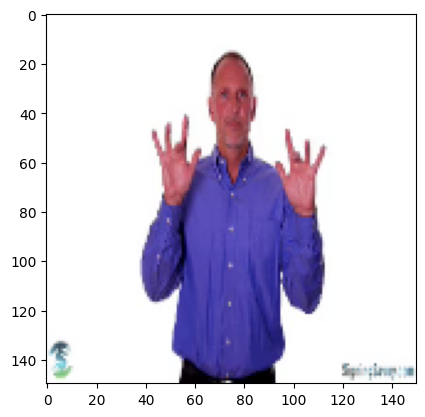

In [44]:
import matplotlib.pyplot as plt
plt.imshow(sampled_frames[0])


In [45]:
selected_df.head(
)


,word,video_id,url,samples_num,video_length
0,computer,12328,https://www.signingsavvy.com/signs/mp4/6/6326.mp4,5,88.0
1,computer,12312,https://s3-us-west-1.amazonaws.com/files.start...,5,101.0
2,computer,12311,https://media.spreadthesign.com/video/mp4/13/5...,5,72.0
3,computer,12338,http://www.aslsearch.com/signs/videos/computer...,5,107.0
4,computer,12313,https://s3-us-west-1.amazonaws.com/files.start...,5,81.0


In [59]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


In [60]:
label_encoder = LabelEncoder()
selected_df['encoded_word'] = label_encoder.fit_transform(selected_df['word'])
y_cat = tf.keras.utils.to_categorical(selected_df['encoded_word'], num_classes=20)
y_cat


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [61]:
y_cat.shape


(219, 20)

In [62]:
y_cat.sum()


219.0